In [ ]:
#Clustering: Hierarchical 
#Dataset: Cities_r2.csv 
#Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. 
#Apply Hierarchical clustering algorithms (based on effective_literacy_rate_total column) to find the group of customers

First 5 Rows:
   name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587                   7283  ...             44972   
1          

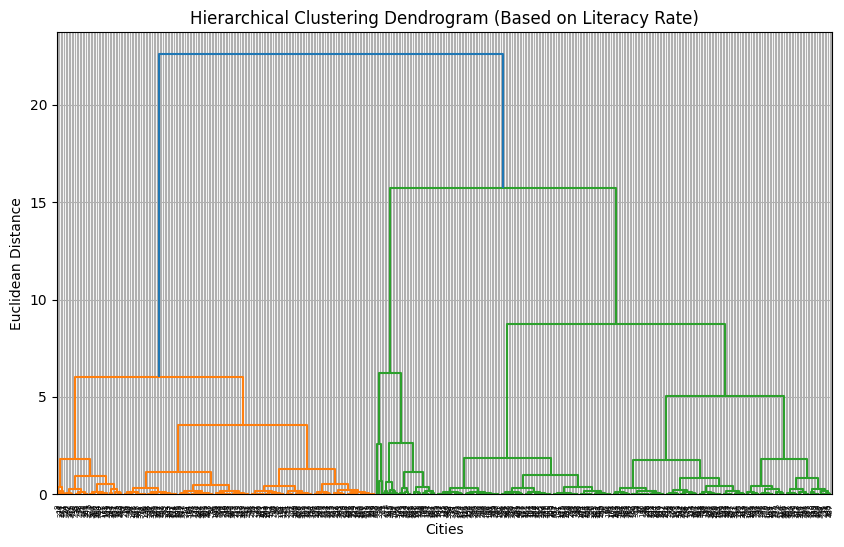

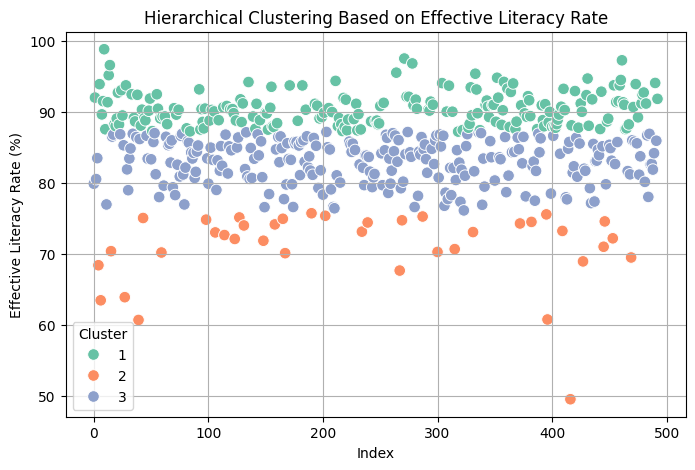


Cluster Summary:
              mean    min    max  count
Cluster                                
1        90.447291  87.20  98.80    203
2        71.010526  49.51  75.70     38
3        82.978611  76.10  87.15    252

Sample of Clustered Cities:
   name_of_city      state_name  effective_literacy_rate_total  Cluster
0      Abohar           PUNJAB                          79.86        3
1    Achalpur      MAHARASHTRA                          91.99        1
2    Adilabad   ANDHRA PRADESH                          80.51        3
3   Adityapur        JHARKHAND                          83.46        3
4       Adoni   ANDHRA PRADESH                          68.38        2
5    Agartala          TRIPURA                          93.88        1
6        Agra    UTTAR PRADESH                          63.44        2
7   Ahmadabad          GUJARAT                          89.62        1
8  Ahmadnagar      MAHARASHTRA                          91.49        1
9      Aizawl          MIZORAM            

In [1]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
data = pd.read_csv("Cities_r2.csv")
print("First 5 Rows:\n", data.head())

# Step 3: Data Preprocessing
# Drop missing values in the target column if any
data = data.dropna(subset=['effective_literacy_rate_total'])

# Step 4: Select feature for clustering
X = data[['effective_literacy_rate_total']]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Perform Hierarchical Clustering
Z = linkage(X_scaled, method='ward')

# Step 7: Plot Dendrogram (complete, not truncated)
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Based on Literacy Rate)")
plt.xlabel("Cities")

plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

# Step 8: Form clusters (choose 3 clusters for example)
data['Cluster'] = fcluster(Z, t=3, criterion='maxclust')

# Step 9: Visualize Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=data.index,
    y=data['effective_literacy_rate_total'],
    hue=data['Cluster'],
    palette='Set2',
    s=70
)
plt.title("Hierarchical Clustering Based on Effective Literacy Rate")
plt.ylabel("Effective Literacy Rate (%)")
plt.xlabel("Index")
plt.grid(True)
plt.show()

# Step 10: Display Cluster Summary
cluster_summary = data.groupby('Cluster')['effective_literacy_rate_total'].agg(['mean', 'min', 'max', 'count'])
print("\nCluster Summary:")
print(cluster_summary)

# Step 11: Sample of Clustered Cities
print("\nSample of Clustered Cities:\n", data[['name_of_city', 'state_name', 'effective_literacy_rate_total', 'Cluster']].head(10))
